<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span></li></ul></div>

In [35]:
import os
import nltk as nl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [3]:
# nl.download_shell()

In [64]:
messages = [line.rstrip() for line in open(os.path.join(".","SMSSpamCollection"))]

In [65]:
len(messages)

5574

In [66]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [67]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [68]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [70]:
messages_df = pd.read_csv("SMSSpamCollection",sep="\t", names = ["Label", "Message"])
messages_df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# EDA

In [71]:
messages_df.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [72]:
messages_df.isna().sum()

Label      0
Message    0
dtype: int64

In [73]:
messages_df.groupby("Label").describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [74]:
messages_df["Length"] = messages_df["Message"].apply(len)
messages_df.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [76]:
messages_df.groupby("Label").describe()

Length                                                         
        count        mean        std   min    25%    50%    75%    max
Label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

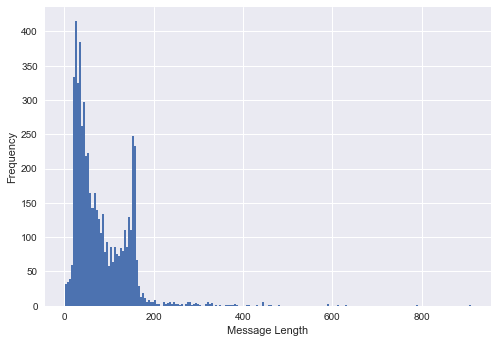

In [78]:
messages_df["Length"].plot.hist(bins=200)
plt.xlabel("Message Length")
plt.show()

In [79]:
messages_df.loc[messages_df["Length"] == 910]["Message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

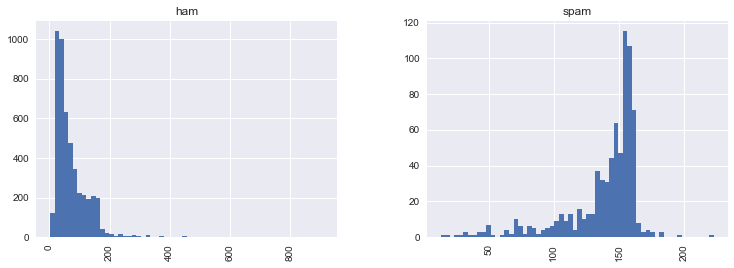

In [89]:
messages_df.hist(column="Length",by="Label",bins=60, figsize=(12,4))
plt.show()

In [93]:
import string

In [91]:
mess = 'Sample Message! Notice: it has punctuation.'

In [97]:
no_punc = [c for c in mess if c not in string.punctuation]

In [124]:
from nltk.corpus import stopwords

In [132]:
all_stopwords = stopwords.words("english")
all_stopwords.remove("no")
all_stopwords.remove("not")

In [134]:
# all_stopwords

In [139]:
no_punc = "".join(no_punc)
print(no_punc)
no_punc.split()

Sample Message Notice it has punctuation


['Sample', 'Message', 'Notice', 'it', 'has', 'punctuation']

In [141]:
clean_mess = [word for word in no_punc.split() if word.lower() not in all_stopwords]
clean_mess

['Sample', 'Message', 'Notice', 'punctuation']

In [151]:
def text_preprocess(mess):
    '''
        Description: removes punctuation, stop words and returns list of preprocessed text data
        Parameters: mess [str]
    '''
    
    no_punc = [char for char in mess if char not in string.punctuation]
    no_punc = "".join(no_punc)
    return [word for word in no_punc.split() if word.lower() not in all_stopwords]

In [152]:
messages_df.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [154]:
messages_df.Message.head().apply(text_preprocess)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [155]:
from sklearn.feature_extraction.text import CountVectorizer

In [156]:
bag_of_words_transformer = CountVectorizer(analyzer=text_preprocess).fit(messages_df.Message)

In [158]:
len(bag_of_words_transformer.vocabulary_)

11431

In [162]:
mess4 = messages_df.Message[3]
mess4

'U dun say so early hor... U c already then say...'

In [174]:
bow4 = bag_of_words_transformer.transform([mess4])
print(bow4)
print(bow4.shape)

  (0, 4072)	2
  (0, 4633)	1
  (0, 5265)	1
  (0, 6208)	1
  (0, 6226)	1
  (0, 7190)	1
  (0, 9560)	2
(1, 11431)


In [188]:
print(bag_of_words_transformer.get_feature_names()[4072])
bag_of_words_transformer.get_feature_names()[9560]

U


'say'